In [ ]:
# Below is an example Python script that demonstrates how you can:

# -Read in spectral CSV data (e.g., transmission or reflection vs. wavelength)
#         for dichroic filters from Chroma and Semrock.
# -Plot these spectra for comparison.
# -Allow user input of file paths.
# -You can adapt this template to specific file structures and naming conventions.

# Example Folder/File Setup
# Assume you have two CSV files in the same folder as this script (these files are included in the Git directory):
#   chroma_t565lpxr.csv
#   semrock_ff562_di03.csv

# Each CSV should have two tab-delimited* columns like:

# Wavelength (nm)   Transmission (%)
# 400   0.01
# 410   0.02
# 420   0.05
# ...
#   * Tab-delimited downloads standard from Chroma (ASCII files), Semrock (CSV files)
# Or, if you have reflectance data, you can replace “Transmission (%)” with
# “Reflectance (%)” or separate columns as needed.

# 

Enter First CSV/TXT filename (default: chroma_t565lpxr.csv): chroma_t565lpxr.csv
Enter Second CSV/TXT filename (default: semrock_ff562_di03.csv): Cascade Blue - Em.txt


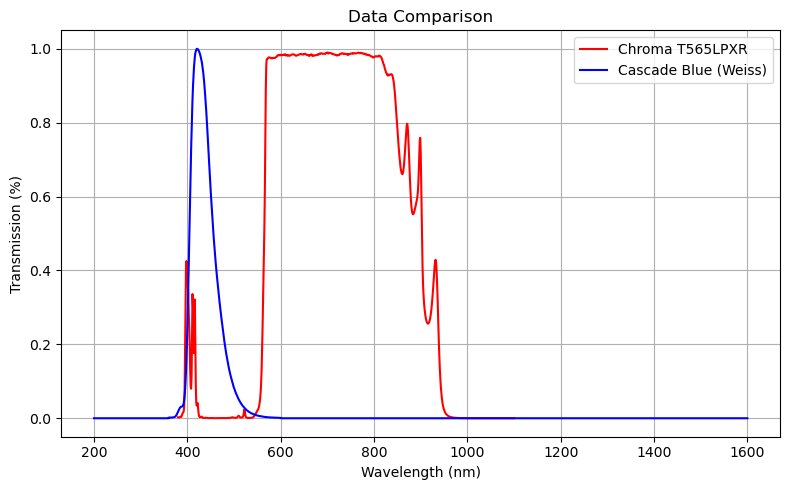

In [2]:
#!/usr/bin/env python3

import csv
import matplotlib.pyplot as plt

def read_spectral_csv(filename):
    """
    Reads a CSV file with two columns:
        1) Wavelength (nm)
        2) Transmission or Reflectance (in % or fraction)

    Returns:
        wavelengths (list of floats)
        values (list of floats)
    """
    wavelengths = []
    values = []
    with open(filename, 'r', encoding='utf-8-sig') as f:
        #reader = csv.reader(f)
        reader = csv.reader(f, delimiter='\t')
        # Optional: skip header if present
        header = next(reader, None)
        # If your file has a header row, this line reads it
        # If it does not, you can comment the above line out

        for row in reader:
            if len(row) < 2:
                continue  # Skip any incomplete rows
            try:
                w = float(row[0])
                v = float(row[1])
                wavelengths.append(w)
                values.append(v)
            except ValueError:
                # Skip rows that don't have valid floats
                continue
    return wavelengths, values

def plot_dichroic_data(wl_first, val_first, wl_second, val_second,
                       label_first,
                       label_second,
                       y_label):
    """
    Plots two curves (e.g., Chroma vs. Semrock) on the same figure
    """
    plt.figure(figsize=(8, 5), dpi=100)

    plt.plot(wl_first, val_first, label=label_first, color='red')
    plt.plot(wl_second, val_second, label=label_second, color='blue')

    plt.title("Data Comparison")
#     plt.title("2P Cross-section")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    # Example usage:
    first_file = input("Enter First CSV/TXT filename (default: chroma_t565lpxr.csv): ") or "chroma_t565lpxr.csv"
    second_file = input("Enter Second CSV/TXT filename (default: semrock_ff562_di03.csv): ") or "semrock_ff562_di03.csv"

    # Read CSV data
    wl_FIRST, val_FIRST = read_spectral_csv(first_file)
    wl_SECOND, val_SECOND = read_spectral_csv(second_file)

#     # Plot the two sets of data
#     plot_dichroic_data(wl_chroma, val_chroma, wl_semrock, val_semrock,
#                        label_chroma="Chroma T565lpxr",
#                        label_semrock="Semrock FF562-Di03",
#                        y_label="Transmission (%)")
    # Plot the two sets of data
    plot_dichroic_data(wl_FIRST, val_FIRST, wl_SECOND, val_SECOND,
                       label_first="Chroma T565LPXR",
                       label_second="Cascade Blue (Weiss)",
                       y_label="Transmission (%)") #label_first="Chroma T565lpxr",label_second="AF 680",

if __name__ == "__main__":
    main()
